In [97]:
import iris
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelmax
from skimage.feature import peak_local_max
from sklearn.cluster import KMeans
import cartopy.crs as ccrs


In [2]:

cx = iris.Constraint(longitude = lambda x: 95<=x<=200)
cy = iris.Constraint(latitude = lambda y: -50<=y<=10)

In [3]:
data=iris.load("/short/tp28/eh6215/Lagrangian/ACCESS-CM2_historical_199301.nc",cx&cy)
e1 = data.extract('ftle_a')[0]
e2 = data.extract('ratio')[0]*(e1+1e-16)

In [4]:
v1 = data.extract('eigenvector_x')[0]*e1
v2 = data.extract('eigenvector_y')[0]*e1

In [5]:
slices1 = []
slices2 = []
slices3 = []
slices4 = []
mm = []
nt,ny,nx = e1.shape
nt=e1.shape[0]
k = 30

for i in range(nt):
    print(i)
    m = peak_local_max(np.log(e1[i].data),min_distance=25, threshold_abs=1)
    for y,x in m:
        if x>=k and y>=k and x<nx-k and y<ny-k:
            slices1.append(e1[i][y-k:y+k+1,x-k:x+k+1].data)
            slices2.append(e2[i][y-k:y+k+1,x-k:x+k+1].data)
            slices3.append(v1[i][y-k:y+k+1,x-k:x+k+1].data)
            slices4.append(v2[i][y-k:y+k+1,x-k:x+k+1].data)
            mm.append((y,x))
        
slices1=np.array(slices1)
slices2=np.array(slices2)
slices3=np.array(slices3)
slices4=np.array(slices4)
mm = np.array(mm)

In [101]:
slices1=np.exp(slices1)
slices2=np.exp(slices2)

In [6]:
slices1.shape

(439, 61, 61)

In [144]:
ns = len(slices1)
na=np.newaxis
vec = np.array([slices1,slices2]).transpose([1,0,2,3]).reshape(ns,2*(2*k+1)**2)

In [145]:
kmeans = KMeans(n_clusters=5).fit(vec)

In [146]:
kmeans.cluster_centers_.min(),vec.min()

(0.006853626305741156, 9.830035098961556e-09)

In [147]:
C = kmeans.cluster_centers_.reshape(5,2,2*k+1,2*k+1)
#s1_C = np.sqrt(C[:,1]**2 + C[:,2]**2)
s1_C = C[:,0]
s2_C = C[:,1]
#s4_C = C[:,2]

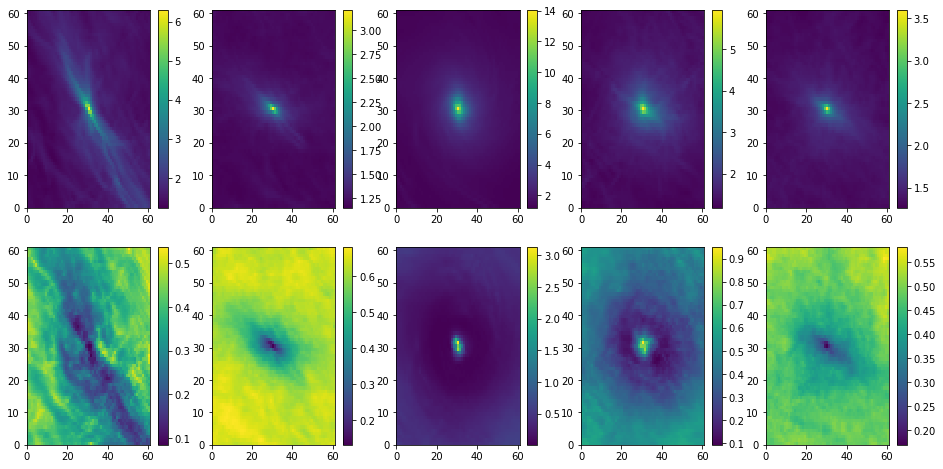

In [148]:
plt.figure(figsize=(16,8))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.pcolormesh(s1_C[i])
    plt.colorbar()
    #plt.quiver(np.arange(61)[::4],np.arange(61)[::4],s3_C[i,::4,::4],s4_C[i,::4,::4])
    plt.subplot(2,5,i+6)
    plt.pcolormesh(s2_C[i])
    plt.colorbar()

In [36]:
 np.array([slices1,slices2]).transpose([1,0,2,3]).shape

(439, 2, 61, 61)

In [30]:
vec2.shape

(2, 439, 61, 61)

In [42]:
v1.shape

(31, 388, 679)

mm.shape

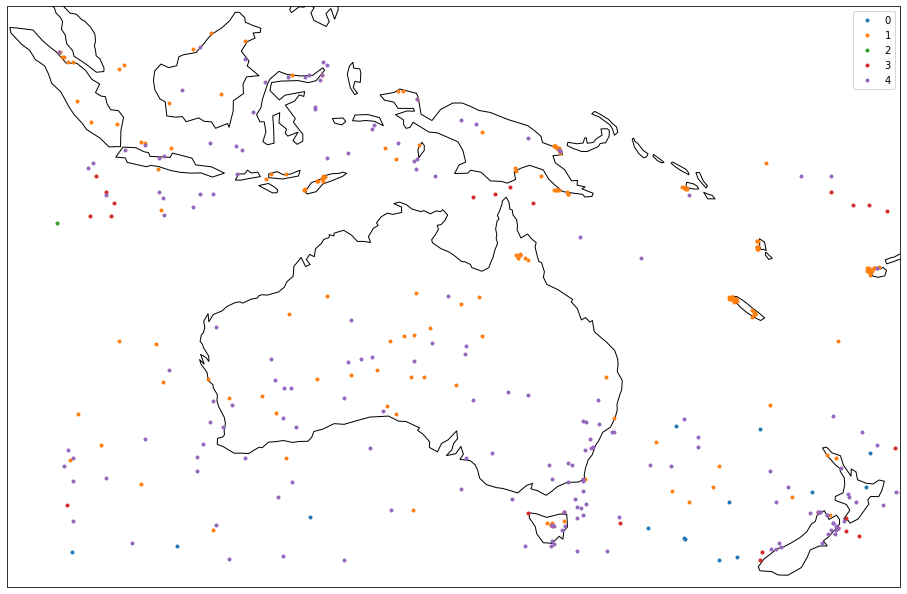

In [160]:
L=kmeans.labels_
plt.figure(figsize=(16,16))

lon=e1.coord('longitude').points
lat=e1.coord('latitude').points
ax=plt.subplot(111,projection=ccrs.PlateCarree())
for i in range(5):
    a=mm[L==i]
    plt.plot(lon[a[:,1]],lat[a[:,0]],'.',label=i)

ax.coastlines()
plt.legend()

In [93]:
np.where(L==2)

(array([  4,   6,   9,  10,  12,  15,  19,  20,  21,  22,  24,  25,  26,
         27,  32,  33,  34,  36,  43,  44,  45,  46,  47,  48,  51,  57,
         59,  61,  63,  65,  72,  73,  82,  83,  84,  86,  88,  95, 100,
        101, 103, 105, 107, 116, 117, 119, 120, 123, 125, 126, 127, 132,
        133, 134, 137, 138, 139, 140, 146, 150, 151, 159, 160, 161, 162,
        163, 164, 173, 174, 175, 177, 178, 182, 183, 186, 190, 191, 192,
        198, 199, 201, 202, 207, 208, 215, 216, 218, 219, 220, 222, 223,
        231, 232, 233, 234, 242, 246, 247, 256, 260, 263, 264, 267, 272,
        275, 276, 281, 282, 283, 284, 285, 288, 293, 297, 301, 302, 304,
        305, 308, 314, 315, 317, 318, 327, 337, 338, 339, 340, 341, 350,
        351, 361, 362, 364, 375, 377, 381, 387, 390, 400, 403, 406, 407,
        421, 422, 433, 436]),)

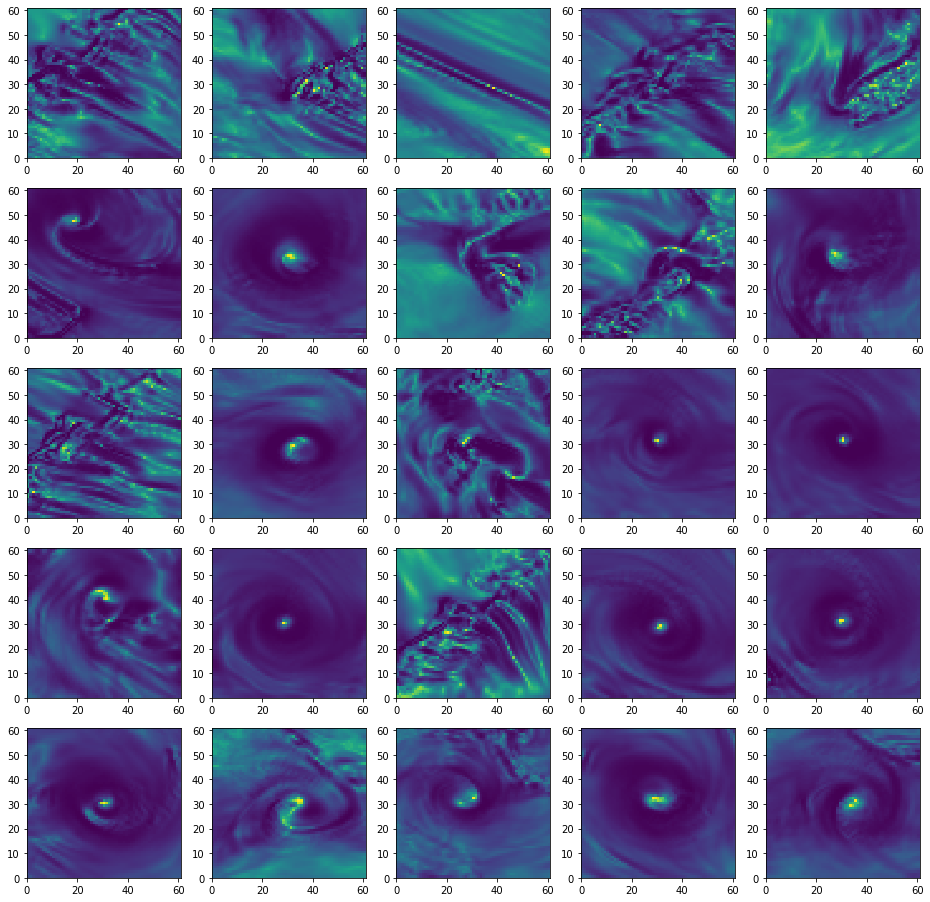

In [166]:
plt.figure(figsize=(16,16))
j = np.where(L==3)

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.pcolormesh(slices2[j][i])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


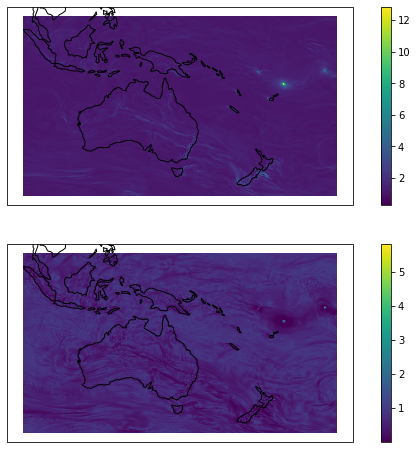

In [153]:
import iris.plot as iplt
plt.figure(figsize=(10,8))
ax=plt.subplot(211,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(e1[0])
plt.colorbar()
ax.coastlines()
ax=plt.subplot(212,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(e2[0])
plt.colorbar()
ax.coastlines()

In [127]:
e2.data.min()

9.830035098961543e-09

In [128]:
slices2.min()

9.830035098961556e-09